In [2]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analyzing the Effect of Healthcare Facilities on the Spread of COVID-19

## Project Overview


In [3]:
data = pd.read_csv('../cnh_data/2024-12-01/covid19_nursing_home_data.csv')
data.head()

/var/folders/5l/vsm1wvjn4qdg25qwjfcj83kr0000gn/T/ipykernel_74334/2185977187.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../cnh_data/2024-12-01/covid19_nursing_home_data.csv')


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Staff Total Confirmed COVID-19,"Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Week Ending', 'Federal Provider Number', 'Provider Name',
       'Provider Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Provider Phone Number', 'County',
       'Submitted Data', 'Passed Quality Assurance Check',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds',
       'Residents Hospitalizations with Confirmed COVID-19',
       'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines',
       'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19',
       'Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test',
       'Number of Residents Staying in this Facility for At Least 1 Day This Week',
       'Number of All Health

**Problem Statement**: We aim to investigate how the characteristics of healthcare facilities - specifically, bed occupancy rates and quality assurance checks - relates to the rate of COVID-19 transmission. We will analyze their impact on COVID-19 confirmed cases, deaths, and hospitalizations amongst residents and staff. 

**Objective:** to determine if a relationship exists between the quality of healthcare facilities and the weekly number of confirmed COVID-19 cases among residents and staff

In other words, we want to predict which healthcare facilities are more likely to have more confirmed COVID-19 cases.

## Data Description

**Dataset Source**: The data was obtained from data.cms.gov [Centers for Medicare & Medicaid Services] from the COVID-19 Nursing Home Data. This includes data reported by nursing homes to the CDC's National Healthcare Safety Network Long Term Care Facility COVID-19 Module. The datset was last updated in December 2024.

In [5]:
# Take a look at the first few rows of the dataset
data.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Staff Total Confirmed COVID-19,"Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Week Ending', 'Federal Provider Number', 'Provider Name',
       'Provider Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Provider Phone Number', 'County',
       'Submitted Data', 'Passed Quality Assurance Check',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds',
       'Residents Hospitalizations with Confirmed COVID-19',
       'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines',
       'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19',
       'Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test',
       'Number of Residents Staying in this Facility for At Least 1 Day This Week',
       'Number of All Health

In [7]:
# Drop the columns with mostly NaN values - they are unimportant to us
dropped = data.drop(columns=['Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test', \
                             'Number of Residents Staying in this Facility for At Least 1 Day This Week', \
                            'Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week', \
                            'Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines', \
                            'Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines', \
                            'Percentage of Current Residents Up to Date with COVID-19 Vaccines', \
                            'Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines', \
                            'Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', \
                            'Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines'])
dropped.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,4.0,4.0,4.0,4.0,57.0,45.0,0.0,0.0,33.0,33.0
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,4.0,0.0,4.0,57.0,42.0,0.0,0.0,2.0,35.0
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,4.0,0.0,4.0,57.0,43.0,0.0,0.0,0.0,35.0
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,4.0,0.0,4.0,57.0,43.0,0.0,0.0,0.0,35.0
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,4.0,0.0,4.0,57.0,45.0,0.0,0.0,0.0,35.0


In [8]:
# Remove identifiers besides Federal Provider Number because they are not necessary for this analysis
without_identifiers = dropped.drop(columns = ['Provider Name', 'Provider Address', 'Provider City', 'Provider Phone Number'])
without_identifiers.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Submitted Data,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
0,05/24/20,15009,AL,35653,Franklin,Y,Y,45.0,45.0,4.0,4.0,4.0,4.0,57.0,45.0,0.0,0.0,33.0,33.0
1,05/31/20,15009,AL,35653,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,42.0,0.0,0.0,2.0,35.0
2,06/07/20,15009,AL,35653,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,43.0,0.0,0.0,0.0,35.0
3,06/14/20,15009,AL,35653,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,43.0,0.0,0.0,0.0,35.0
4,06/21/20,15009,AL,35653,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,45.0,0.0,0.0,0.0,35.0


In [9]:
one_hot_mapping = {'Y': 1, 'N': 0}
without_identifiers['Submitted Data'] = without_identifiers['Submitted Data'].map(one_hot_mapping)
without_identifiers['Passed Quality Assurance Check'] = without_identifiers['Passed Quality Assurance Check'].map(one_hot_mapping)
without_identifiers['Week Ending'] = pd.to_datetime(without_identifiers['Week Ending'])
without_identifiers.head()

/var/folders/5l/vsm1wvjn4qdg25qwjfcj83kr0000gn/T/ipykernel_74334/2454634303.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  without_identifiers['Week Ending'] = pd.to_datetime(without_identifiers['Week Ending'])


,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Submitted Data,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
0,2020-05-24,15009,AL,35653,Franklin,1,1.0,45.0,45.0,4.0,4.0,4.0,4.0,57.0,45.0,0.0,0.0,33.0,33.0
1,2020-05-31,15009,AL,35653,Franklin,1,1.0,0.0,45.0,0.0,4.0,0.0,4.0,57.0,42.0,0.0,0.0,2.0,35.0
2,2020-06-07,15009,AL,35653,Franklin,1,1.0,0.0,45.0,0.0,4.0,0.0,4.0,57.0,43.0,0.0,0.0,0.0,35.0
3,2020-06-14,15009,AL,35653,Franklin,1,1.0,0.0,45.0,0.0,4.0,0.0,4.0,57.0,43.0,0.0,0.0,0.0,35.0
4,2020-06-21,15009,AL,35653,Franklin,1,1.0,0.0,45.0,0.0,4.0,0.0,4.0,57.0,45.0,0.0,0.0,0.0,35.0


In [10]:
# federal provider number -> ascending; week ending -> descending
# Only keep the most recent data for each duplicated Federal Provider Number
df_sorted = without_identifiers.sort_values(by=['Federal Provider Number', 'Week Ending'], ascending=[True, False])
most_recent = df_sorted.drop_duplicates(subset='Federal Provider Number', keep='first')
most_recent.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Submitted Data,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
236,2024-12-01,15009,AL,35653,Franklin,1,1.0,0.0,98.0,0.0,65.0,0.0,5.0,NaN,NaN,0.0,0.0,0.0,70.0
473,2024-12-01,15010,AL,35150,Talladega,1,1.0,0.0,106.0,0.0,5.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,191.0
710,2024-12-01,15012,AL,35768,Jackson,1,1.0,0.0,47.0,0.0,61.0,0.0,3.0,NaN,NaN,0.0,0.0,0.0,109.0
947,2024-12-01,15014,AL,35206,Jefferson,0,NaN,0.0,141.0,0.0,40.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,153.0
1184,2024-12-01,15015,AL,35111,Jefferson,0,NaN,0.0,116.0,0.0,191.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,52.0


In [11]:
# Drop metadata
dropped_metadata = most_recent.drop(columns = ['Submitted Data'])
dropped_metadata.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
236,2024-12-01,15009,AL,35653,Franklin,1.0,0.0,98.0,0.0,65.0,0.0,5.0,NaN,NaN,0.0,0.0,0.0,70.0
473,2024-12-01,15010,AL,35150,Talladega,1.0,0.0,106.0,0.0,5.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,191.0
710,2024-12-01,15012,AL,35768,Jackson,1.0,0.0,47.0,0.0,61.0,0.0,3.0,NaN,NaN,0.0,0.0,0.0,109.0
947,2024-12-01,15014,AL,35206,Jefferson,NaN,0.0,141.0,0.0,40.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,153.0
1184,2024-12-01,15015,AL,35111,Jefferson,NaN,0.0,116.0,0.0,191.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,52.0


In [12]:
# Check NaN values
dropped_metadata.isna().sum()

Week Ending                                                                            0
Federal Provider Number                                                                0
Provider State                                                                         0
Provider Zip Code                                                                      0
County                                                                                 0
Passed Quality Assurance Check                                                      5333
Residents Weekly Confirmed COVID-19                                                  146
Residents Total Confirmed COVID-19                                                   146
Residents Weekly All Deaths                                                          148
Residents Total All Deaths                                                           148
Residents Weekly COVID-19 Deaths                                                     148
Residents Total COVID

In [13]:
for col in dropped_metadata.columns[dropped_metadata.isna().any()]:
    if dropped_metadata[col].dtype in ['float64', 'int64']:
        overall_mean = dropped_metadata[col].mean() # global mean in case the County mean is NaN
        # fill remaining NaNs with the global mean
        dropped_metadata[col] = dropped_metadata.groupby('County')[col].transform(lambda x: x.fillna(x.mean())).fillna(overall_mean)
dropped_metadata.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
236,2024-12-01,15009,AL,35653,Franklin,1.0,0.0,98.0,0.0,65.0,0.0,5.0,103.285714,14.142857,0.0,0.0,0.0,70.0
473,2024-12-01,15010,AL,35150,Talladega,1.0,0.0,106.0,0.0,5.0,0.0,2.0,76.040757,17.984035,0.0,0.0,0.0,191.0
710,2024-12-01,15012,AL,35768,Jackson,1.0,0.0,47.0,0.0,61.0,0.0,3.0,160.200000,48.800000,0.0,0.0,0.0,109.0
947,2024-12-01,15014,AL,35206,Jefferson,1.0,0.0,141.0,0.0,40.0,0.0,2.0,89.157895,23.315789,0.0,0.0,0.0,153.0
1184,2024-12-01,15015,AL,35111,Jefferson,1.0,0.0,116.0,0.0,191.0,0.0,0.0,89.157895,23.315789,0.0,0.0,0.0,52.0


In [14]:
# All NaNs have been removed
dropped_metadata.isna().sum()

Week Ending                                                                        0
Federal Provider Number                                                            0
Provider State                                                                     0
Provider Zip Code                                                                  0
County                                                                             0
Passed Quality Assurance Check                                                     0
Residents Weekly Confirmed COVID-19                                                0
Residents Total Confirmed COVID-19                                                 0
Residents Weekly All Deaths                                                        0
Residents Total All Deaths                                                         0
Residents Weekly COVID-19 Deaths                                                   0
Residents Total COVID-19 Deaths                                  

In [15]:
dropped_metadata.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
236,2024-12-01,15009,AL,35653,Franklin,1.0,0.0,98.0,0.0,65.0,0.0,5.0,103.285714,14.142857,0.0,0.0,0.0,70.0
473,2024-12-01,15010,AL,35150,Talladega,1.0,0.0,106.0,0.0,5.0,0.0,2.0,76.040757,17.984035,0.0,0.0,0.0,191.0
710,2024-12-01,15012,AL,35768,Jackson,1.0,0.0,47.0,0.0,61.0,0.0,3.0,160.200000,48.800000,0.0,0.0,0.0,109.0
947,2024-12-01,15014,AL,35206,Jefferson,1.0,0.0,141.0,0.0,40.0,0.0,2.0,89.157895,23.315789,0.0,0.0,0.0,153.0
1184,2024-12-01,15015,AL,35111,Jefferson,1.0,0.0,116.0,0.0,191.0,0.0,0.0,89.157895,23.315789,0.0,0.0,0.0,52.0


In [16]:
# Double check datatypes of the DataFrame
dropped_metadata.dtypes

Week Ending                                                                        datetime64[ns]
Federal Provider Number                                                                    object
Provider State                                                                             object
Provider Zip Code                                                                           int64
County                                                                                     object
Passed Quality Assurance Check                                                            float64
Residents Weekly Confirmed COVID-19                                                       float64
Residents Total Confirmed COVID-19                                                        float64
Residents Weekly All Deaths                                                               float64
Residents Total All Deaths                                                                float64
Residents Weekly COV

In [17]:
df = dropped_metadata.copy()
df.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
236,2024-12-01,15009,AL,35653,Franklin,1.0,0.0,98.0,0.0,65.0,0.0,5.0,103.285714,14.142857,0.0,0.0,0.0,70.0
473,2024-12-01,15010,AL,35150,Talladega,1.0,0.0,106.0,0.0,5.0,0.0,2.0,76.040757,17.984035,0.0,0.0,0.0,191.0
710,2024-12-01,15012,AL,35768,Jackson,1.0,0.0,47.0,0.0,61.0,0.0,3.0,160.200000,48.800000,0.0,0.0,0.0,109.0
947,2024-12-01,15014,AL,35206,Jefferson,1.0,0.0,141.0,0.0,40.0,0.0,2.0,89.157895,23.315789,0.0,0.0,0.0,153.0
1184,2024-12-01,15015,AL,35111,Jefferson,1.0,0.0,116.0,0.0,191.0,0.0,0.0,89.157895,23.315789,0.0,0.0,0.0,52.0


In [18]:
# 15,564 rows and 18 columns
df.shape

(15654, 18)

In [19]:
df.columns

Index(['Week Ending', 'Federal Provider Number', 'Provider State',
       'Provider Zip Code', 'County', 'Passed Quality Assurance Check',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds',
       'Residents Hospitalizations with Confirmed COVID-19',
       'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines',
       'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19'],
      dtype='object')

In [20]:
df.head()

,Week Ending,Federal Provider Number,Provider State,Provider Zip Code,County,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
236,2024-12-01,15009,AL,35653,Franklin,1.0,0.0,98.0,0.0,65.0,0.0,5.0,103.285714,14.142857,0.0,0.0,0.0,70.0
473,2024-12-01,15010,AL,35150,Talladega,1.0,0.0,106.0,0.0,5.0,0.0,2.0,76.040757,17.984035,0.0,0.0,0.0,191.0
710,2024-12-01,15012,AL,35768,Jackson,1.0,0.0,47.0,0.0,61.0,0.0,3.0,160.200000,48.800000,0.0,0.0,0.0,109.0
947,2024-12-01,15014,AL,35206,Jefferson,1.0,0.0,141.0,0.0,40.0,0.0,2.0,89.157895,23.315789,0.0,0.0,0.0,153.0
1184,2024-12-01,15015,AL,35111,Jefferson,1.0,0.0,116.0,0.0,191.0,0.0,0.0,89.157895,23.315789,0.0,0.0,0.0,52.0


## Exploratory Data Analysis

In [67]:
# imports
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [53]:
df.describe().loc[['min','25%', '50%', '75%', 'max']]

,Week Ending,Provider Zip Code,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19
min,2020-05-24 00:00:00,660.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
25%,2024-12-01 00:00:00,30032.25,1.0,0.0,79.0,0.0,37.0,0.0,3.0,66.750000,9.000000,0.0,0.0,0.0,78.0
50%,2024-12-01 00:00:00,48959.00,1.0,0.0,129.0,0.0,72.0,0.0,8.0,76.040757,17.984035,0.0,0.0,0.0,115.0
75%,2024-12-01 00:00:00,73007.25,1.0,0.0,192.0,0.0,121.0,0.0,15.0,80.000000,17.984035,0.0,0.0,0.0,165.0
max,2024-12-01 00:00:00,99929.00,1.0,80.0,3924.0,4.0,3032.0,2.0,593.0,543.000000,230.000000,4.0,2.0,13.0,1875.0


In [ ]:
weekly = df.copy()
weekly = weekly.sort_values(by = 'Week Ending')[['Week Ending','Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths']]
weekly = weekly.groupby('Week Ending').sum().reset_index() # Aggregating since there are repeat weeks
weekly['Week Ending'] = pd.to_datetime(weekly['Week Ending'])
weekly

,Week Ending,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths
0,2020-05-24,2.000000e+00,0.000000
1,2020-05-31,8.350000e+01,0.750000
2,2020-06-07,0.000000e+00,0.000000
3,2020-06-14,1.468491e+02,11.924528
4,2020-06-21,0.000000e+00,4.000000
...,...,...,...
220,2024-10-06,6.730000e+02,52.000000
221,2024-10-20,9.200000e+01,9.000000
222,2024-10-27,4.900000e+01,5.000000
223,2024-11-10,1.400000e+01,0.000000


In [72]:
weekly.describe()

,Week Ending,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths
count,225,2.250000e+02,225.000000
mean,2022-08-13 06:49:36,1.009398e+04,792.536097
min,2020-05-24 00:00:00,0.000000e+00,0.000000
25%,2021-07-04 00:00:00,6.300000e+01,7.000000
50%,2022-08-14 00:00:00,1.530000e+02,18.945205
75%,2023-09-17 00:00:00,2.710000e+02,33.500000
max,2024-12-01 00:00:00,2.228530e+06,173082.480413
std,NaN,1.485561e+05,11537.292287


In [73]:
weekly_long = pd.melt(
    weekly,
    id_vars=["Week Ending"],
    value_vars=["Residents Total Confirmed COVID-19", "Residents Total COVID-19 Deaths"],
    var_name="Category",
    value_name="Counts",
)
weekly_long

,Week Ending,Category,Counts
0,2020-05-24,Residents Total Confirmed COVID-19,2.000000
1,2020-05-31,Residents Total Confirmed COVID-19,83.500000
2,2020-06-07,Residents Total Confirmed COVID-19,0.000000
3,2020-06-14,Residents Total Confirmed COVID-19,146.849057
4,2020-06-21,Residents Total Confirmed COVID-19,0.000000
...,...,...,...
445,2024-10-06,Residents Total COVID-19 Deaths,52.000000
446,2024-10-20,Residents Total COVID-19 Deaths,9.000000
447,2024-10-27,Residents Total COVID-19 Deaths,5.000000
448,2024-11-10,Residents Total COVID-19 Deaths,0.000000


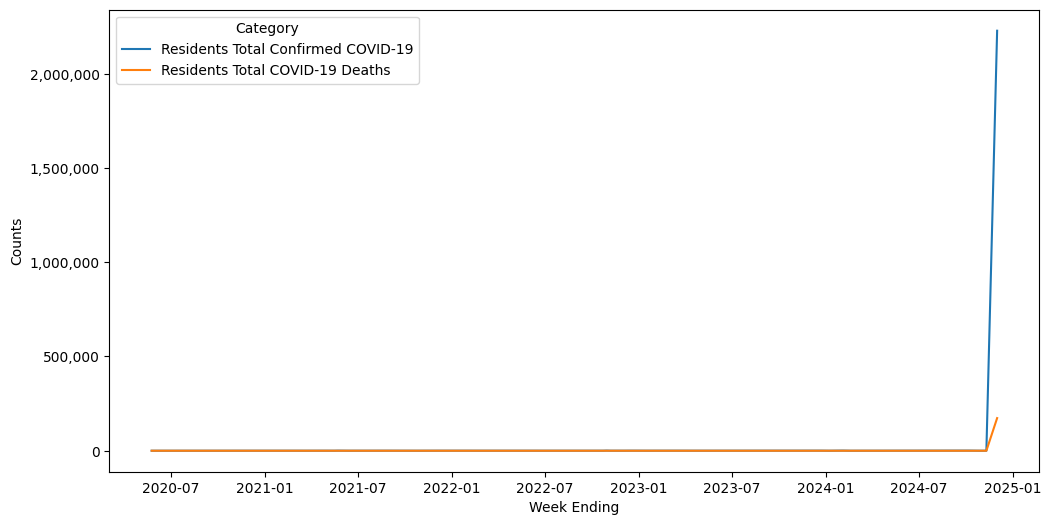

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(data = weekly_long, x = 'Week Ending', y = 'Counts', hue = 'Category')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}')) # use this to show regular numbers instead of 1.0E06 in the y-axis
# plt.xlim(weekly['Week Ending'].min(), weekly['Week Ending'].max())
plt.show()

In [79]:
weekly['Week Ending'].sort_values().tail()

220   2024-10-06
221   2024-10-20
222   2024-10-27
223   2024-11-10
224   2024-12-01
Name: Week Ending, dtype: datetime64[ns]